# Lab Tutorial

## 1. Data Structure

### 1.1 Define


In [89]:
# utilize heapq
# record nodes and priority

import heapq

class PriorityQueue:

    def __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        # return True if this item is updated (priority changed or newly inserted), False if unchanged
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    return False
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                return True
        else:
            self.push(item, priority)
            return True
        
pq = PriorityQueue()
print('pq: ',pq, '\npq.heap = ',pq.heap, '\npq.count=', pq.count)

pq:  <__main__.PriorityQueue object at 0x00000213079E9F60> 
pq.heap =  [] 
pq.count= 0


### 1.2 Push

In [90]:
pq.push("Start", 0)
pq.push("A", 4)
pq.push("B", 6)
print('The original queue:')
print(pq.heap)

The original queue:
[(0, 0, 'Start'), (4, 1, 'A'), (6, 2, 'B')]


### 1.3 Update

In [91]:
pq.update("Goal", 8)
print('Update an item which not in queue:')
print(pq.heap)

pq.update("Goal", 2)
print('Update an item with higher priority:')
print(pq.heap)

pq.update("Goal", 8)
print('Update an item with lower priority:')
print(pq.heap)

Update an item which not in queue:
[(0, 0, 'Start'), (4, 1, 'A'), (6, 2, 'B'), (8, 3, 'Goal')]
Update an item with higher priority:
[(0, 0, 'Start'), (2, 3, 'Goal'), (6, 2, 'B'), (4, 1, 'A')]
Update an item with lower priority:
[(0, 0, 'Start'), (2, 3, 'Goal'), (6, 2, 'B'), (4, 1, 'A')]


### 1.4 Pop

In [92]:
while not(pq.isEmpty()):
    print(pq.pop())

Start
Goal
A
B


## 2. I/O

In [93]:
filename = "./testcases/input3.txt"

with open(filename, "r") as f:
    s = f.read().strip().split("\n")
    
Actions = [item.split() for item in s]
print(Actions[:-1])

[['Start', 'A', '24'], ['Start', 'B', '47'], ['Start', 'C', '71'], ['A', 'D', '120'], ['A', 'B', '25'], ['B', 'D', '88'], ['B', 'E', '55'], ['B', 'F', '66'], ['B', 'C', '23'], ['C', 'E', '31'], ['C', 'F', '42'], ['E', 'D', '31'], ['E', 'F', '74'], ['D', 'Goal', '29'], ['E', 'Goal', '79'], ['F', 'G', '66']]


In [94]:
# visulize
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


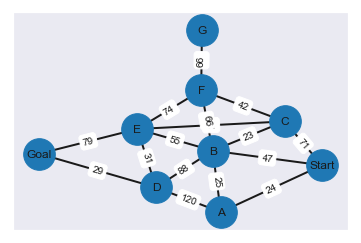

In [95]:
nodes = set([item[0] for item in Actions[:-1]] + [item[1] for item in Actions[:-1]])
edges = [(item[0], item[1], int(item[2])) for item in Actions[:-1]]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
G = nx.Graph()
for node in nodes:
    G.add_node(node)
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])
    
pos = nx.spring_layout(G)  # positions for all nodes
weight = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, weight)
ax.grid(False)
plt.show()